In [2]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
plt.style.use('fivethirtyeight')

In [3]:
data = Path('.', 'data', 'iris.data')
iris = pd.read_csv(data)

In [5]:
iris.head()

sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [7]:
iris.loc[:, 'species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [8]:
iris.isnull().sum()


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
iris.groupby('species').mean()

sepal_length  sepal_width  petal_length  petal_width
species                                                              
Iris-setosa             5.006        3.418         1.464        0.244
Iris-versicolor         5.936        2.770         4.260        1.326
Iris-virginica          6.588        2.974         5.552        2.026

In [12]:
iris.groupby('species').describe().loc[:, 'petal_width']

count   mean       std  min  25%  50%  75%  max
species                                                         
Iris-setosa       50.0  0.244  0.107210  0.1  0.2  0.2  0.3  0.6
Iris-versicolor   50.0  1.326  0.197753  1.0  1.2  1.3  1.5  1.8
Iris-virginica    50.0  2.026  0.274650  1.4  1.8  2.0  2.3  2.5

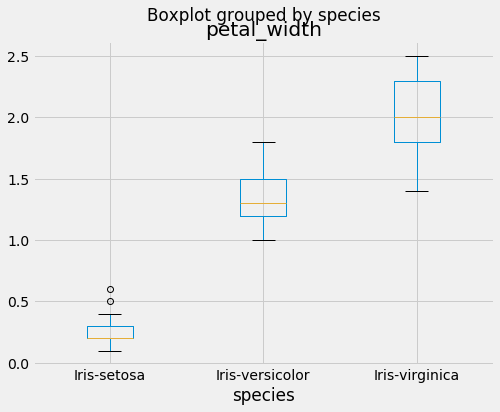

In [13]:
iris.boxplot(column='petal_width', by='species')

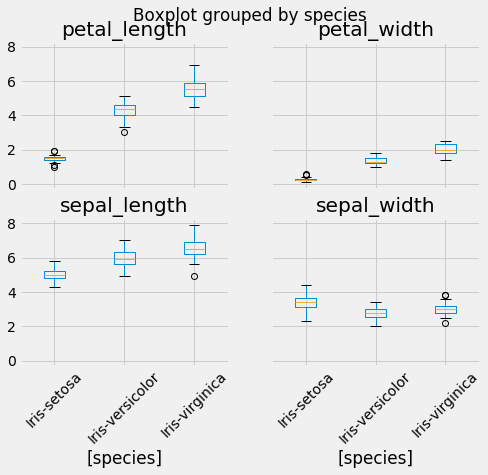

In [15]:
iris.boxplot(by='species', rot=45);

In [16]:
iris.loc[:, 'species_num'] = (iris.loc[:, 'species'].map(
    {'Iris-setosa': 0,
     'Iris-versicolor': 1,
     'Iris-virginica': 2}))

In [17]:
iris.head()

sepal_length  sepal_width  petal_length  petal_width      species  \
0           5.1          3.5           1.4          0.2  Iris-setosa   
1           4.9          3.0           1.4          0.2  Iris-setosa   
2           4.7          3.2           1.3          0.2  Iris-setosa   
3           4.6          3.1           1.5          0.2  Iris-setosa   
4           5.0          3.6           1.4          0.2  Iris-setosa   

   species_num  
0            0  
1            0  
2            0  
3            0  
4            0

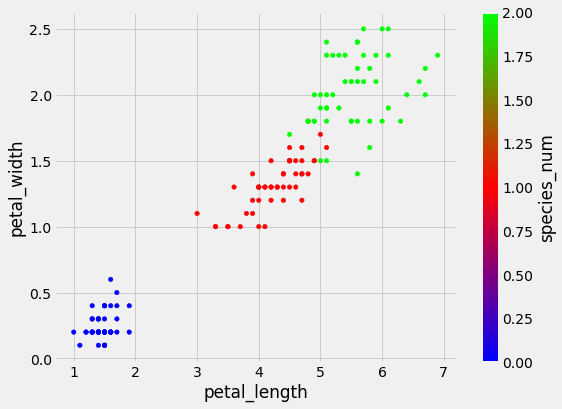

In [18]:
iris.plot(kind='scatter', 
          x='petal_length',
          y='petal_width',
          c='species_num',
          colormap='brg')

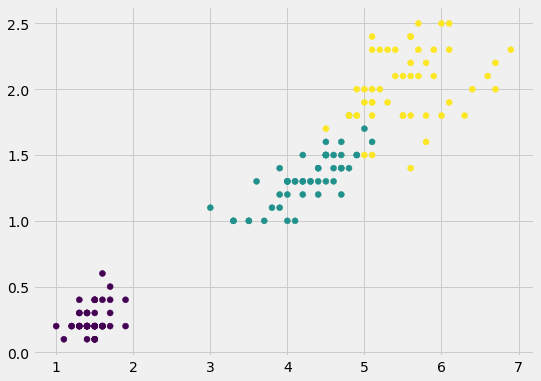

In [19]:
plt.scatter(data=iris, x='petal_length',
            y='petal_width',
            c='species_num')

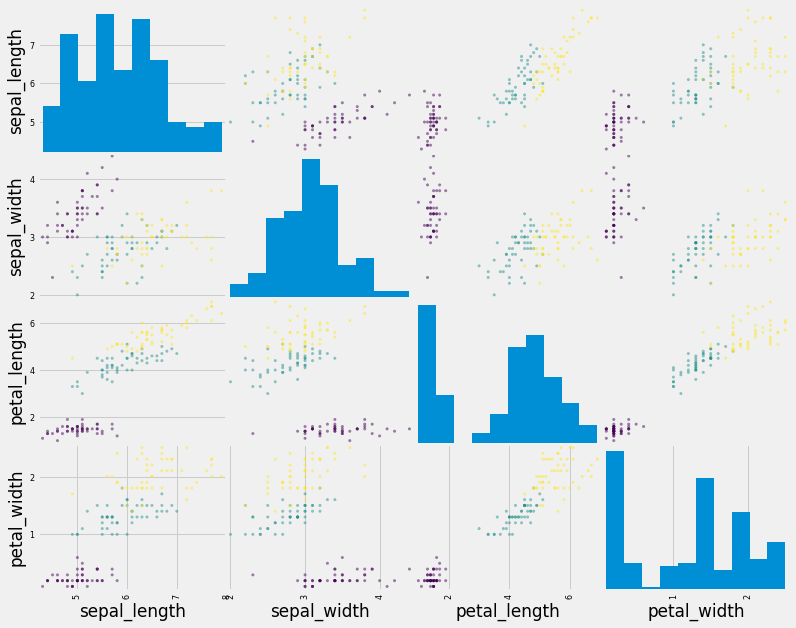

In [20]:
pd.plotting.scatter_matrix(iris.drop('species_num', axis=1),
                           c=iris.loc[:, 'species_num'],
                           figsize=(12,10));

In [21]:
iris.loc[:, 'petal_area'] = (iris.loc[:, 'petal_length'] * 
                             iris.loc[:, 'petal_width'] *
                             3.14)

In [22]:
iris.head()

sepal_length  sepal_width  petal_length  petal_width      species  \
0           5.1          3.5           1.4          0.2  Iris-setosa   
1           4.9          3.0           1.4          0.2  Iris-setosa   
2           4.7          3.2           1.3          0.2  Iris-setosa   
3           4.6          3.1           1.5          0.2  Iris-setosa   
4           5.0          3.6           1.4          0.2  Iris-setosa   

   species_num  petal_area  
0            0      0.8792  
1            0      0.8792  
2            0      0.8164  
3            0      0.9420  
4            0      0.8792

In [24]:
iris.groupby('species')['petal_area'].describe()

count       mean       std      min       25%      50%  \
species                                                                   
Iris-setosa       50.0   1.139192  0.575398   0.3454   0.83210   0.9420   
Iris-versicolor   50.0  17.962056  4.296785  10.3620  15.26040  17.6311   
Iris-virginica    50.0  35.470068  6.774275  23.5500  30.51295  35.9373   

                     75%      max  
species                            
Iris-setosa       1.3188   3.0144  
Iris-versicolor  21.1950  27.1296  
Iris-virginica   40.1606  49.8318

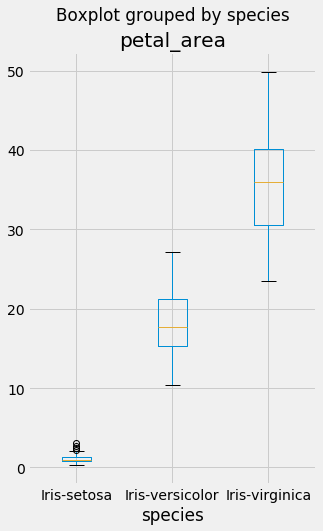

In [25]:
iris.boxplot(column='petal_area', by='species', figsize=(5, 8))

In [27]:
filter = (iris.loc[:, 'petal_area'] > 23) & (iris.loc[:, 'petal_area'] < 27)

iris.loc[filter, :].sort_values('petal_area')

sepal_length  sepal_width  petal_length  petal_width          species  \
52            6.9          3.1           4.9          1.5  Iris-versicolor   
72            6.3          2.5           4.9          1.5  Iris-versicolor   
119           6.0          2.2           5.0          1.5   Iris-virginica   
56            6.3          3.3           4.7          1.6  Iris-versicolor   
106           4.9          2.5           4.5          1.7   Iris-virginica   
133           6.3          2.8           5.1          1.5   Iris-virginica   
134           6.1          2.6           5.6          1.4   Iris-virginica   
83            6.0          2.7           5.1          1.6  Iris-versicolor   
77            6.7          3.0           5.0          1.7  Iris-versicolor   

     species_num  petal_area  
52             1     23.0790  
72             1     23.0790  
119            2     23.5500  
56             1     23.6128  
106            2     24.0210  
133            2     24.0210  
134            2     24.6176  
83             1     25.6224  
77             1     26.6900

In [28]:
iris

sepal_length  sepal_width  petal_length  petal_width         species  \
0             5.1          3.5           1.4          0.2     Iris-setosa   
1             4.9          3.0           1.4          0.2     Iris-setosa   
2             4.7          3.2           1.3          0.2     Iris-setosa   
3             4.6          3.1           1.5          0.2     Iris-setosa   
4             5.0          3.6           1.4          0.2     Iris-setosa   
5             5.4          3.9           1.7          0.4     Iris-setosa   
6             4.6          3.4           1.4          0.3     Iris-setosa   
7             5.0          3.4           1.5          0.2     Iris-setosa   
8             4.4          2.9           1.4          0.2     Iris-setosa   
9             4.9          3.1           1.5          0.1     Iris-setosa   
10            5.4          3.7           1.5          0.2     Iris-setosa   
11            4.8          3.4           1.6          0.2     Iris-setosa   
12            4.8          3.0           1.4          0.1     Iris-setosa   
13            4.3          3.0           1.1          0.1     Iris-setosa   
14            5.8          4.0           1.2          0.2     Iris-setosa   
15            5.7          4.4           1.5          0.4     Iris-setosa   
16            5.4          3.9           1.3          0.4     Iris-setosa   
17            5.1          3.5           1.4          0.3     Iris-setosa   
18            5.7          3.8           1.7          0.3     Iris-setosa   
19            5.1          3.8           1.5          0.3     Iris-setosa   
20            5.4          3.4           1.7          0.2     Iris-setosa   
21            5.1          3.7           1.5          0.4     Iris-setosa   
22            4.6          3.6           1.0          0.2     Iris-setosa   
23            5.1          3.3           1.7          0.5     Iris-setosa   
24            4.8          3.4           1.9          0.2     Iris-setosa   
25            5.0          3.0           1.6          0.2     Iris-setosa   
26            5.0          3.4           1.6          0.4     Iris-setosa   
27            5.2          3.5           1.5          0.2     Iris-setosa   
28            5.2          3.4           1.4          0.2     Iris-setosa   
29            4.7          3.2           1.6          0.2     Iris-setosa   
..            ...          ...           ...          ...             ...   
120           6.9          3.2           5.7          2.3  Iris-virginica   
121           5.6          2.8           4.9          2.0  Iris-virginica   
122           7.7          2.8           6.7          2.0  Iris-virginica   
123           6.3          2.7           4.9          1.8  Iris-virginica   
124           6.7          3.3           5.7          2.1  Iris-virginica   
125           7.2          3.2           6.0          1.8  Iris-virginica   
126           6.2          2.8           4.8          1.8  Iris-virginica   
127           6.1          3.0           4.9          1.8  Iris-virginica   
128           6.4          2.8           5.6          2.1  Iris-virginica   
129           7.2          3.0           5.8          1.6  Iris-virginica   
130           7.4          2.8           6.1          1.9  Iris-virginica   
131           7.9          3.8           6.4          2.0  Iris-virginica   
132           6.4          2.8           5.6          2.2  Iris-virginica   
133           6.3          2.8           5.1          1.5  Iris-virginica   
134           6.1          2.6           5.6          1.4  Iris-virginica   
135           7.7          3.0           6.1          2.3  Iris-virginica   
136           6.3          3.4           5.6          2.4  Iris-virginica   
137           6.4          3.1           5.5          1.8  Iris-virginica   
138           6.0          3.0           4.8          1.8  Iris-virginica   
139           6.9          3.1           5.4          2.1  Iris-virginica   
1

In [29]:
# Starter code

def predict_flower(row):
    if row.loc['petal_area'] < 8:
        prediction = 'Iris-setosa'
    elif row.loc['petal_area'] < 24:
        prediction = 'Iris-versicolor'
    else:
        prediction = 'Iris-virginica'

    return prediction

# Apply your classifier row-wise
iris.loc[:, 'prediction'] = iris.apply(predict_flower, axis=1)

iris.head()

sepal_length  sepal_width  petal_length  petal_width      species  \
0           5.1          3.5           1.4          0.2  Iris-setosa   
1           4.9          3.0           1.4          0.2  Iris-setosa   
2           4.7          3.2           1.3          0.2  Iris-setosa   
3           4.6          3.1           1.5          0.2  Iris-setosa   
4           5.0          3.6           1.4          0.2  Iris-setosa   

   species_num  petal_area   prediction  
0            0      0.8792  Iris-setosa  
1            0      0.8792  Iris-setosa  
2            0      0.8164  Iris-setosa  
3            0      0.9420  Iris-setosa  
4            0      0.8792  Iris-setosa

In [30]:
sum(iris.loc[:, 'species'] == iris.loc[:, 'prediction']) /150

0.97333333333333338

In [34]:
iris.loc[:, 'pred_num'] = (iris.loc[:, 'prediction']
                           .map({'Iris-setosa':0,
                                 'Iris-versicolor':1,
                                 'Iris-virginica':2}))

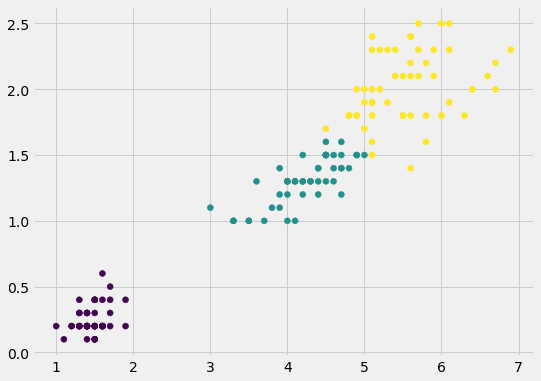

In [36]:
plt.scatter(data=iris, 
                x='petal_length',
                y= 'petal_width',
                c='pred_num')

In [37]:
from pathlib import Path
path = Path('.', 'data', 'NBA_players_2015.csv')
nba = pd.read_csv(path, index_col=0)

In [39]:
nba.loc[:, 'pos_num'] = nba.loc[:, 'pos'].map({'C':0,
                                               'F':1,
                                               'G':2})

In [41]:
nba.head()

player pos  age bref_team_id   g  gs    mp   fg   fga  \
season_end                                                                 
2015           Quincy Acy   F   24          NYK  52  21  19.2  2.2   4.6   
2015         Jordan Adams   G   20          MEM  18   0   7.3  1.0   2.1   
2015         Steven Adams   C   21          OKC  51  50  24.2  3.0   5.5   
2015          Jeff Adrien   F   28          MIN  17   0  12.6  1.1   2.6   
2015        Arron Afflalo   G   29          TOT  60  54  32.5  5.0  11.8   

              fg_   ...     USG%  OWS  DWS   WS  WS/48  OBPM  DBPM  BPM  VORP  \
season_end          ...                                                         
2015        0.469   ...     14.7  0.6  0.5  1.0  0.050  -2.6  -0.7 -3.4  -0.3   
2015        0.474   ...     17.7  0.0  0.2  0.2  0.076  -2.3   1.8 -0.5   0.0   
2015        0.550   ...     14.8  1.0  1.8  2.8  0.109  -2.0   2.0 -0.1   0.6   
2015        0.432   ...     14.1  0.2  0.2  0.4  0.093  -2.6   0.8 -1.8   0.0   
2015        0.426   ...     19.6  1.4  0.7  2.1  0.051  -0.2  -1.4 -1.6   0.2   

            pos_num  
season_end           
2015              1  
2015              2  
2015              0  
2015              1  
2015              2  

[5 rows x 49 columns]

In [42]:
feature_cols = ['ast', 'stl', 'blk', 'tov', 'pf']
X = nba.loc[:, feature_cols]

In [44]:
y = nba.loc[:, 'pos_num']

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99, shuffle=True)

In [47]:
knn1 = KNeighborsClassifier(n_neighbors = 1)
knn1.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [48]:
y_pred_class = knn1.predict(X_test)

metrics.accuracy_score(y_test, y_pred_class)

0.6166666666666667

In [49]:
y_train.value_counts()

1    150
2    140
0     68
Name: pos_num, dtype: int64

In [50]:
y_pred_null=np.ones(y_test.shape)
metrics.accuracy_score(y_test, y_pred_null)

0.40833333333333333

In [51]:
knn = KNeighborsClassifier(n_neighbors=5)

In [52]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [53]:
y_pred_class = knn.predict(X_test)

In [54]:
df = pd.DataFrame(knn.predict_proba(X_test))

In [60]:
df

0    1    2
0    0.4  0.6  0.0
1    0.0  0.2  0.8
2    0.4  0.6  0.0
3    0.4  0.4  0.2
4    0.0  0.4  0.6
5    0.6  0.2  0.2
6    0.6  0.4  0.0
7    0.4  0.6  0.0
8    0.0  0.2  0.8
9    0.0  1.0  0.0
10   0.0  0.6  0.4
11   0.2  0.6  0.2
12   0.4  0.6  0.0
13   0.6  0.4  0.0
14   0.2  0.4  0.4
15   0.0  0.0  1.0
16   0.8  0.2  0.0
17   0.4  0.6  0.0
18   0.0  0.2  0.8
19   0.0  0.8  0.2
20   0.0  0.6  0.4
21   0.4  0.6  0.0
22   0.0  0.2  0.8
23   0.0  0.8  0.2
24   0.0  0.0  1.0
25   0.2  0.6  0.2
26   0.4  0.6  0.0
27   0.0  0.2  0.8
28   0.0  0.0  1.0
29   0.2  0.8  0.0
..   ...  ...  ...
90   0.0  0.8  0.2
91   0.0  0.8  0.2
92   0.2  0.6  0.2
93   0.0  0.8  0.2
94   0.0  0.2  0.8
95   0.0  0.0  1.0
96   0.0  0.6  0.4
97   0.8  0.2  0.0
98   0.0  0.8  0.2
99   0.0  0.0  1.0
100  0.2  0.6  0.2
101  0.0  0.6  0.4
102  0.2  0.8  0.0
103  0.4  0.4  0.2
104  0.4  0.4  0.2
105  0.0  0.2  0.8
106  0.4  0.6  0.0
107  0.0  0.0  1.0
108  0.4  0.6  0.0
109  0.0  0.0  1.0
110  0.2  0.6  0.2
111  0.0  0.2  0.8
112  0.0  0.4  0.6
113  0.0  0.2  0.8
114  0.2  0.4  0.4
115  0.0  0.2  0.8
116  0.0  0.0  1.0
117  0.4  0.6  0.0
118  0.0  0.8  0.2
119  0.0  0.0  1.0

[120 rows x 3 columns]

In [61]:
scores = []
for k in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X, y)
    pred = knn.predict(X)
    score = (pred == y).mean()
    scores.append([k, score])

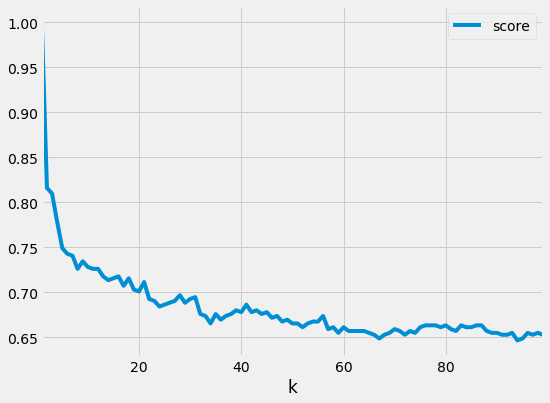

In [63]:
data = pd.DataFrame(scores, columns=['k', 'score'])
data.plot(x='k', y='score');

In [65]:
training_error = []
testing_error = []

for k in range(1, 100):
    knn= KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    
    y_pred_class = knn.predict(X_train)
    training_accuracy = metrics.accuracy_score(y_train, y_pred_class)
    training_error.append(1 - training_accuracy)
    
    y_pred_class = knn.predict(X_test)
    testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
    testing_error.append(1 - testing_accuracy)

In [66]:
#Create dataframe of K, training error, and testing error

column_dict = ({'K': range(1, 100),
                'training_error': training_error,
                'testing_error': testing_error})

df = pd.DataFrame(column_dict).set_index('K').sort_index(ascending=True)
df.head()

testing_error  training_error
K                               
1       0.383333        0.000000
2       0.450000        0.206704
3       0.366667        0.178771
4       0.383333        0.223464
5       0.325000        0.268156

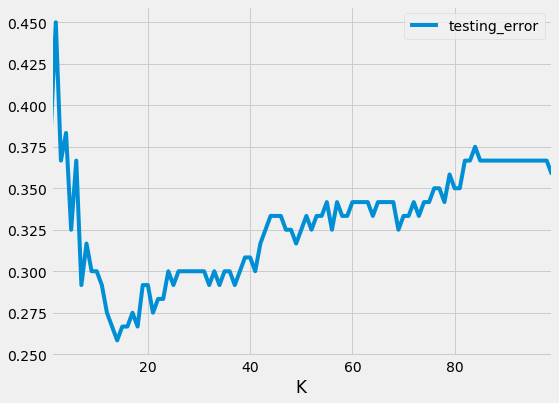

In [67]:
df.plot(y='testing_error')

In [69]:
#Find the min testing value
df.sort_values('testing_error').head(1)

testing_error  training_error
K                                
14       0.258333        0.312849

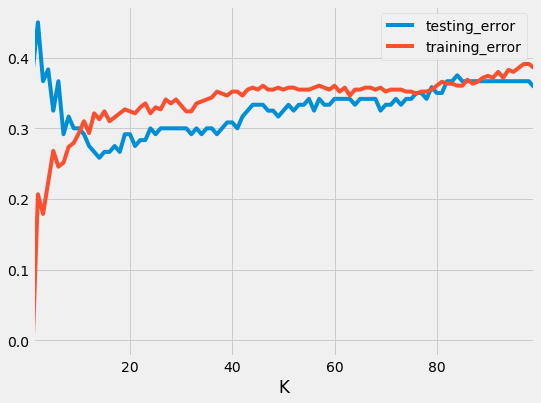

In [70]:
#plot relationship of K against both Training Error and Testing Error
df.plot()